In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as Go

In [2]:
#Tiingo API Key
#d4f97a94b2b3d47ecca77ecf4fba8202840835d7

## Gather Data

In [3]:
import requests
from datetime import datetime

api_key = "token=d4f97a94b2b3d47ecca77ecf4fba8202840835d7"
ticker = "aapl"
base_url = "https://api.tiingo.com/tiingo/daily/"
start_date = "startDate=2000-1-1"
current_date = datetime.now().date()
end_date = "endDate=" + str(current_date)
format ="format=csv"

request_url = base_url + ticker + "/prices?" + start_date + "&" + end_date + "&" + format + "&" + api_key

print(request_url)

https://api.tiingo.com/tiingo/daily/aapl/prices?startDate=2000-1-1&endDate=2025-05-11&format=csv&token=d4f97a94b2b3d47ecca77ecf4fba8202840835d7


In [4]:
headers = {'Content-Type': 'application/json'}
requestResponse = requests.get(request_url,
                                    headers=headers)
data = pd.read_csv(request_url)

In [200]:
#data

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6377 entries, 0 to 6376
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6377 non-null   datetime64[ns]
 1   close        6377 non-null   float64       
 2   high         6377 non-null   float64       
 3   low          6377 non-null   float64       
 4   open         6377 non-null   float64       
 5   volume       6377 non-null   int64         
 6   adjClose     6377 non-null   float64       
 7   adjHigh      6377 non-null   float64       
 8   adjLow       6377 non-null   float64       
 9   adjOpen      6377 non-null   float64       
 10  adjVolume    6377 non-null   int64         
 11  divCash      6377 non-null   float64       
 12  splitFactor  6377 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 647.8 KB


In [202]:
data["date"] = pd.to_datetime(data["date"])

## Data Visualisation 

In [205]:
"""
fig = Go.Figure()
#fig.add_trace(Go.Scatter(x=data["date"],y=data["close"],name="Close Price"))
fig.add_trace(Go.Scatter(x=data["date"],y=data["adjClose"],name="Adj. Close Price"))
fig.add_trace(Go.Scatter(x=data["date"],y=data["adjClose"].rolling(50).mean(),name="Adj. Close Price MA 50"))
fig.add_trace(Go.Scatter(x=data["date"],y=data["adjClose"].rolling(100).mean(),name="Adj. Close Price MA 100"))
fig.add_trace(Go.Scatter(x=data["date"],y=data["adjClose"].rolling(150).mean(),name="Adj. Close Price MA 150"))

#Data Transformations
#Log transformation ylogy

"""
#Apple's fourth and final stock split to date happened on 9 June 2014. 
#This was the most significant of Apple's stock splits, with a seven-to-one ratio taking shares from close to $700 down to around $100
#Though the latest split was 4to1 in 28 Aug 2020
#Adjusted price adjusts the price and reevaluates it based on the stock splits
#Thus the adjusted and non-adjusted is the same after the august 2020
#In Cumulative, from 1987 on 224x divided, from 21 June 2000 on 112x divided
#I will use adjusted price!!

'\nfig = Go.Figure()\n#fig.add_trace(Go.Scatter(x=data["date"],y=data["close"],name="Close Price"))\nfig.add_trace(Go.Scatter(x=data["date"],y=data["adjClose"],name="Adj. Close Price"))\nfig.add_trace(Go.Scatter(x=data["date"],y=data["adjClose"].rolling(50).mean(),name="Adj. Close Price MA 50"))\nfig.add_trace(Go.Scatter(x=data["date"],y=data["adjClose"].rolling(100).mean(),name="Adj. Close Price MA 100"))\nfig.add_trace(Go.Scatter(x=data["date"],y=data["adjClose"].rolling(150).mean(),name="Adj. Close Price MA 150"))\n\n#Data Transformations\n#Log transformation ylogy\n\n'

### Transforming the Data and Trying to Make it Stationary

In [206]:
from sklearn.preprocessing import PowerTransformer
from scipy import stats
pt = PowerTransformer(method="box-cox",standardize=True)
#Data Transformations
#The optimal lambda parameter for minimizing skewness is estimated on each feature independently using maximum likelihood.
auto_tf = pt.fit_transform(data[["adjClose"]])
log_tf = stats.boxcox(data[["adjClose"]],lmbda=0)
sqrt_tf = stats.boxcox(data[["adjClose"]],lmbda=0.5)
mn_sqrt_tf = stats.boxcox(data[["adjClose"]],lmbda=-0.5)
inv_tf = stats.boxcox(data[["adjClose"]],lmbda=-1)



In [207]:
"""
fig = Go.Figure()

fig.add_trace(Go.Scatter(x=data["date"],y=data["adjClose"],name="Adj. Close Price"))
#Box Cox Transformations
fig.add_trace(Go.Scatter(x=data["date"],y=pd.DataFrame(auto_tf)[0],name="Auto Transform"))
fig.add_trace(Go.Scatter(x=data["date"],y=pd.DataFrame(auto_tf)[0].diff(),name="Auto Transform Diff 1"))
fig.add_trace(Go.Scatter(x=data["date"],y=pd.DataFrame(log_tf)[0],name="Log Transform"))
fig.add_trace(Go.Scatter(x=data["date"],y=pd.DataFrame(sqrt_tf)[0],name="Sqrt Transform"))
fig.add_trace(Go.Scatter(x=data["date"],y=pd.DataFrame(mn_sqrt_tf)[0],name="Mn Sqrt Transform"))
fig.add_trace(Go.Scatter(x=data["date"],y=pd.DataFrame(inv_tf)[0],name="Inverse  Transform"))
#fig.add_trace(Go.Scatter(x=data["date"],y=data["adjClose"].rolling(50).mean(),name="Adj. Close Price MA 50"))
#fig.add_trace(Go.Scatter(x=data["date"],y=data["adjClose"].rolling(100).mean(),name="Adj. Close Price MA 100"))
#fig.add_trace(Go.Scatter(x=data["date"],y=data["adjClose"].rolling(150).mean(),name="Adj. Close Price MA 150"))
"""

'\nfig = Go.Figure()\n\nfig.add_trace(Go.Scatter(x=data["date"],y=data["adjClose"],name="Adj. Close Price"))\n#Box Cox Transformations\nfig.add_trace(Go.Scatter(x=data["date"],y=pd.DataFrame(auto_tf)[0],name="Auto Transform"))\nfig.add_trace(Go.Scatter(x=data["date"],y=pd.DataFrame(auto_tf)[0].diff(),name="Auto Transform Diff 1"))\nfig.add_trace(Go.Scatter(x=data["date"],y=pd.DataFrame(log_tf)[0],name="Log Transform"))\nfig.add_trace(Go.Scatter(x=data["date"],y=pd.DataFrame(sqrt_tf)[0],name="Sqrt Transform"))\nfig.add_trace(Go.Scatter(x=data["date"],y=pd.DataFrame(mn_sqrt_tf)[0],name="Mn Sqrt Transform"))\nfig.add_trace(Go.Scatter(x=data["date"],y=pd.DataFrame(inv_tf)[0],name="Inverse  Transform"))\n#fig.add_trace(Go.Scatter(x=data["date"],y=data["adjClose"].rolling(50).mean(),name="Adj. Close Price MA 50"))\n#fig.add_trace(Go.Scatter(x=data["date"],y=data["adjClose"].rolling(100).mean(),name="Adj. Close Price MA 100"))\n#fig.add_trace(Go.Scatter(x=data["date"],y=data["adjClose"].rolli

In [208]:
"""
#Clearly the data is not stationary
#For Adjusted Price
fig = Go.Figure()
#Best One is percent Change
fig.add_trace(Go.Scatter(x=data["date"],y=data.diff(50)["adjClose"],name="Diff 50"))
fig.add_trace(Go.Scatter(x=data["date"],y=np.log(data["adjClose"]),name="Natural Log"))
fig.add_trace(Go.Scatter(x=data["date"],y=np.log(data["adjClose"]).diff(),name="Natural Log Diff 1"))
fig.add_trace(Go.Scatter(x=data["date"],y=data["adjClose"].pct_change(),name="Percent Change"))
"""

'\n#Clearly the data is not stationary\n#For Adjusted Price\nfig = Go.Figure()\n#Best One is percent Change\nfig.add_trace(Go.Scatter(x=data["date"],y=data.diff(50)["adjClose"],name="Diff 50"))\nfig.add_trace(Go.Scatter(x=data["date"],y=np.log(data["adjClose"]),name="Natural Log"))\nfig.add_trace(Go.Scatter(x=data["date"],y=np.log(data["adjClose"]).diff(),name="Natural Log Diff 1"))\nfig.add_trace(Go.Scatter(x=data["date"],y=data["adjClose"].pct_change(),name="Percent Change"))\n'

In [209]:
#Time Series Module
import statsmodels.tsa.api as tsa
#Time Series Plots Module
import statsmodels.graphics.tsaplots as tsap

In [211]:
"""
#Adjusted price percent change
data_pred = data[["date","adjClose"]]
data_pred["adjClose"] = data_pred["adjClose"].pct_change()
data_pred.dropna(inplace=True)

print(tsap.plot_acf(data_pred["adjClose"]))
"""

'\n#Adjusted price percent change\ndata_pred = data[["date","adjClose"]]\ndata_pred["adjClose"] = data_pred["adjClose"].pct_change()\ndata_pred.dropna(inplace=True)\n\nprint(tsap.plot_acf(data_pred["adjClose"]))\n'

In [212]:
"""
#To see the ACF Better extract the 0th index
#It shuts of after the first index which is the data itselt so no autocorrelation ??
fig = Go.Figure()
fig.add_trace(Go.Scatter(x=np.arange(0,len(tsa.acf(data_pred["adjClose"],nlags=100))), y=tsa.acf(data_pred["adjClose"],nlags=100)[1:]))
"""

'\n#To see the ACF Better extract the 0th index\n#It shuts of after the first index which is the data itselt so no autocorrelation ??\nfig = Go.Figure()\nfig.add_trace(Go.Scatter(x=np.arange(0,len(tsa.acf(data_pred["adjClose"],nlags=100))), y=tsa.acf(data_pred["adjClose"],nlags=100)[1:]))\n'

In [213]:
#print(tsap.plot_pacf(data_pred["adjClose"]))

In [214]:
"""
#To see the ACF Better extract the 0th index
#It shuts of after the first index which is the data itselt so no pacf ??
fig = Go.Figure()
fig.add_trace(Go.Scatter(x=np.arange(0,len(tsa.pacf(data_pred["adjClose"],nlags=100))), y=tsa.pacf(data_pred["adjClose"],nlags=100)[1:]))
"""

'\n#To see the ACF Better extract the 0th index\n#It shuts of after the first index which is the data itselt so no pacf ??\nfig = Go.Figure()\nfig.add_trace(Go.Scatter(x=np.arange(0,len(tsa.pacf(data_pred["adjClose"],nlags=100))), y=tsa.pacf(data_pred["adjClose"],nlags=100)[1:]))\n'

## Base Model Trial

### Regression Based Methods

In [215]:
#Try Linear Regression with MA feature
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#Prepare Data
reg_trial_data = data[["date","adjClose"]]
reg_trial_data["MA7"] = data["adjClose"].rolling(7).mean()
reg_trial_data.dropna(inplace=True)
reg_trial_data.index = reg_trial_data["date"]
reg_trial_data.drop("date",axis=1,inplace=True)

X_train,X_test,y_train,y_test = train_test_split(reg_trial_data[["MA7"]],reg_trial_data[["adjClose"]],shuffle=False,test_size=0.10)
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
linear_model.score(linear_model.predict(X_test),y_test)

C:\Users\BeratErcan\AppData\Local\Temp\ipykernel_15464\1570157252.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\BeratErcan\AppData\Local\Temp\ipykernel_15464\1570157252.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\BeratErcan\AppData\Local\Temp\ipykernel_15464\1570157252.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\BeratErcan\anaconda

0.9785876372648641

In [216]:
"""
fig = Go.Figure()
fig.add_trace(Go.Scatter(x=X_test.index,y=y_test["adjClose"],name="Real Vals"))
fig.add_trace(Go.Scatter(x=X_test.index,y=pd.DataFrame(linear_model.predict(X_test))[0],name="Prediction"))
"""

'\nfig = Go.Figure()\nfig.add_trace(Go.Scatter(x=X_test.index,y=y_test["adjClose"],name="Real Vals"))\nfig.add_trace(Go.Scatter(x=X_test.index,y=pd.DataFrame(linear_model.predict(X_test))[0],name="Prediction"))\n'

In [217]:
from sklearn.metrics import mean_absolute_percentage_error,root_mean_squared_error
#This seem to work really well.
#Yet I cannot make prediction without MA7 Values but I do not know them as well.
#I can predict one step ahead then calculate MA7 with the predicted and then predict the next step and so on ?
#But the errors will compound as the time passes.--
#Tried this this can be done but not sure if its worth it.
print("MAPE:" + str(mean_absolute_percentage_error(linear_model.predict(X_test),X_test)))
print("RMSE",str(root_mean_squared_error(linear_model.predict(X_test),X_test)))

MAPE:0.001881733470570643
RMSE 0.36087777259426834


### Try Trend Decomposition using Simple Linear Regression 

In [218]:
trend_model = LinearRegression()
trend_data = data[["adjClose"]]
trend_data = trend_data.reset_index()
trend_data.index = data["date"]
trend_data.columns = [["t","adjClose"]]
trend_data["t^2"] = trend_data["t"]**2
X_train_trend,X_test_trend,y_train_trend,y_test_trend = train_test_split(trend_data[["t","t^2"]],trend_data[["adjClose"]],shuffle=False,test_size=0.10)

In [220]:
#trend_data

In [221]:
#This was my learning trial, actually I should fit this to train set only
#to prevent data leakage
trend_model.fit(trend_data[["t","t^2"]],trend_data[["adjClose"]])
#trend_model.score(trend_model.predict(X_test_trend),y_test_trend)

LinearRegression()

In [222]:
trend_data.reset_index()["adjClose"]

,adjClose
0,0.842092
1,0.771078
2,0.782362
3,0.714657
4,0.748510
...,...
6372,198.890000
6373,198.510000
6374,196.250000
6375,197.490000


In [223]:
pd.DataFrame(trend_model.predict(trend_data[["t","t^2"]]))

,0
0,26.519367
1,26.479402
2,26.439458
3,26.399535
4,26.359634
...,...
6372,205.207105
6373,205.303177
6374,205.399270
6375,205.495384


In [224]:
"""
fig = Go.Figure()
#discard trend
x = data["adjClose"].reset_index()["adjClose"] - pd.DataFrame(trend_model.predict(trend_data[["t","t^2"]]))[0]
fig.add_trace(Go.Scatter(x=trend_data.index,y=data["adjClose"],name="Real Vals"))
fig.add_trace(Go.Scatter(x=trend_data.index,y=pd.DataFrame(trend_model.predict(trend_data[["t","t^2"]]))[0],name="Prediction"))
fig.add_trace(Go.Scatter(x=trend_data.index,y=x,name="Detrended"))
"""

'\nfig = Go.Figure()\n#discard trend\nx = data["adjClose"].reset_index()["adjClose"] - pd.DataFrame(trend_model.predict(trend_data[["t","t^2"]]))[0]\nfig.add_trace(Go.Scatter(x=trend_data.index,y=data["adjClose"],name="Real Vals"))\nfig.add_trace(Go.Scatter(x=trend_data.index,y=pd.DataFrame(trend_model.predict(trend_data[["t","t^2"]]))[0],name="Prediction"))\nfig.add_trace(Go.Scatter(x=trend_data.index,y=x,name="Detrended"))\n'

In [225]:
#data

### Seasonality - Trend Decomposition using STSL

In [226]:
from statsmodels.tsa.seasonal import STL

#Fit STL to train data to prevent data leakage
STL_data = data[["adjClose"]].copy()
STL_data.index = data["date"]

X_train_STL,X_test_STL = train_test_split(STL_data["adjClose"],test_size=0.10,shuffle=False)

#Try for different seasonal periods and observe residual part with acf and pacf
#Ideally Acf and Pacf should be around 0 for residuals
stl = STL(X_train_STL, period=5, robust=True)
result = stl.fit()

trend = result.trend
seasonal = result.seasonal
resid = result.resid

In [227]:
"""
fig = Go.Figure()
fig.add_trace(Go.Scatter(x=X_train_STL.index,y=X_train_STL,name="Real Values"))
fig.add_trace(Go.Scatter(x=trend.index,y=trend,name="Trend"))
fig.add_trace(Go.Scatter(x=seasonal.index,y=seasonal,name="Seasonal"))
fig.add_trace(Go.Scatter(x=resid.index,y=resid,name="Residual"))
"""

'\nfig = Go.Figure()\nfig.add_trace(Go.Scatter(x=X_train_STL.index,y=X_train_STL,name="Real Values"))\nfig.add_trace(Go.Scatter(x=trend.index,y=trend,name="Trend"))\nfig.add_trace(Go.Scatter(x=seasonal.index,y=seasonal,name="Seasonal"))\nfig.add_trace(Go.Scatter(x=resid.index,y=resid,name="Residual"))\n'

In [228]:
#Ideally Acf and Pacf should be around 0 for residuals
#print(tsap.plot_acf(resid))

In [30]:
#I will later continue with trend decomposition methods. For now Just move on with LSTMS

In [229]:
#data

### LSTMS

In [230]:
#This part is bigger than expected and will be bigger I guess. I will divide it from on.
#Time Series / Regression Based / Lstms -- 3 Notebooks

In [231]:
#Try Linear Regression with MA feature
lstm_data = data[["adjClose"]]
lstm_data.index = data["date"]
#Use data after pandemic only, use 60days
#lstm_data_first = lstm_data.loc["2023-05-01":,:].copy()
lstm_data_first = lstm_data.copy()

In [232]:
lstm_data_first

,adjClose
date,
2000-01-03,0.842092
2000-01-04,0.771078
2000-01-05,0.782362
2000-01-06,0.714657
2000-01-07,0.748510
...,...
2025-05-05,198.890000
2025-05-06,198.510000
2025-05-07,196.250000


In [233]:
#Create sequences data frame
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i+window_size,:])
        y.append(data.iloc[i+window_size,:])
    return np.array(X), np.array(y)

In [234]:
#Create sequences np array
def create_sequences_np(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size,:])
        y.append(data[i+window_size,:])
    return np.array(X), np.array(y)

In [235]:
from sklearn.model_selection import train_test_split
#First divide the data as train and test
#Then scale and then create sequences
X_train_l,X_test_l= train_test_split(lstm_data_first,shuffle=False,test_size=0.10)


In [236]:
X_test_l

,adjClose
date,
2022-10-24,147.491687
2022-10-25,150.343818
2022-10-26,147.392997
2022-10-27,142.902618
2022-10-28,153.699266
...,...
2025-05-05,198.890000
2025-05-06,198.510000
2025-05-07,196.250000


In [237]:
# Step 2: Normalize
scaler = MinMaxScaler()
scaled_data_train_l = scaler.fit_transform(X_train_l.values)
scaled_data_test_l = scaler.transform(X_test_l.values)

In [238]:
X_train,y_train = create_sequences_np(scaled_data_train_l,30)

In [239]:
X_test,y_test = create_sequences_np(scaled_data_test_l,30)

In [241]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(64, input_shape=(30, 1)))
model.add(Dense(1))  # Predict the next day price
model.compile(optimizer='adam', loss='mse')

#history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

In [242]:
predictions = scaler.inverse_transform(model.predict(X_test))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [243]:
len(predictions)

608

In [244]:
X_test_l[30:]

,adjClose
date,
2022-12-06,141.271800
2022-12-07,139.324383
2022-12-08,141.014781
2022-12-09,140.530398
2022-12-12,142.833689
...,...
2025-05-05,198.890000
2025-05-06,198.510000
2025-05-07,196.250000


In [245]:
real_vals = scaler.inverse_transform(y_test)
#real_vals

In [246]:
len(X_test_l)

638

In [247]:
X_test_l[30:].index

DatetimeIndex(['2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09',
               '2022-12-12', '2022-12-13', '2022-12-14', '2022-12-15',
               '2022-12-16', '2022-12-19',
               ...
               '2025-04-28', '2025-04-29', '2025-04-30', '2025-05-01',
               '2025-05-02', '2025-05-05', '2025-05-06', '2025-05-07',
               '2025-05-08', '2025-05-09'],
              dtype='datetime64[ns]', name='date', length=608, freq=None)

In [249]:
"""
fig = Go.Figure()

fig.add_trace(Go.Scatter(x=X_test_l[30:].index,y=pd.DataFrame(real_vals)[0],name="Real Values"))
fig.add_trace(Go.Scatter(x=X_test_l[30:].index,y=pd.DataFrame(predictions)[0],name="Predictions"))
"""

'\nfig = Go.Figure()\n\nfig.add_trace(Go.Scatter(x=X_test_l[30:].index,y=pd.DataFrame(real_vals)[0],name="Real Values"))\nfig.add_trace(Go.Scatter(x=X_test_l[30:].index,y=pd.DataFrame(predictions)[0],name="Predictions"))\n'

In [250]:
#Predict the future
last_30_days = scaled_data_test_l[-30:]  # Last 60 days in scaled data
last_30_days = last_30_days.reshape((1, 30, 1))  # Reshape to (1, 60, 1)


In [251]:
last_30_days

array([[[1.21833983],
        [1.24201239],
        [1.24794452],
        [1.25186196],
        [1.13601753],
        [1.0531356 ],
        [1.01440886],
        [0.96381786],
        [1.11172938],
        [1.06455215],
        [1.10781193],
        [1.13226798],
        [1.13014136],
        [1.0860981 ],
        [1.1012642 ],
        [1.07988615],
        [1.11671013],
        [1.14390838],
        [1.16500662],
        [1.1700993 ],
        [1.17491216],
        [1.18090025],
        [1.18811954],
        [1.19270855],
        [1.14810565],
        [1.11195323],
        [1.10982662],
        [1.09717887],
        [1.10411834],
        [1.10993854]]])

In [252]:
predictions_f = []

for i in range(7):  # Predict the next 7 days (next week)
    pred = model.predict(last_30_days)  # Predict next day
    predictions_f.append(pred)
    
    # Append the prediction to the input sequence
    last_30_days = np.append(last_30_days[:, 1:, :], pred.reshape(1, 1, 1), axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [253]:
predicted_prices = scaler.inverse_transform(np.array(predictions_f).reshape(-1, 1))

In [254]:
X_test_l[30:].index+timedelta(9)

DatetimeIndex(['2022-12-15', '2022-12-16', '2022-12-17', '2022-12-18',
               '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-24',
               '2022-12-25', '2022-12-28',
               ...
               '2025-05-07', '2025-05-08', '2025-05-09', '2025-05-10',
               '2025-05-11', '2025-05-14', '2025-05-15', '2025-05-16',
               '2025-05-17', '2025-05-18'],
              dtype='datetime64[ns]', name='date', length=608, freq=None)

In [255]:
from datetime import timedelta
(X_test_l[30:].index + timedelta(9))[-7:]

DatetimeIndex(['2025-05-10', '2025-05-11', '2025-05-14', '2025-05-15',
               '2025-05-16', '2025-05-17', '2025-05-18'],
              dtype='datetime64[ns]', name='date', freq=None)

In [256]:
"""
fig = Go.Figure()

fig.add_trace(Go.Scatter(x=X_test_l[30:].index,y=pd.DataFrame(real_vals)[0],name="Real Values"))
fig.add_trace(Go.Scatter(x=X_test_l[30:].index,y=pd.DataFrame(predictions)[0],name="Predictions"))
fig.add_trace(Go.Scatter(x=(X_test_l[30:].index + timedelta(9))[-7:],y=pd.DataFrame(predicted_prices)[0],name="Future Predictions"))
"""

'\nfig = Go.Figure()\n\nfig.add_trace(Go.Scatter(x=X_test_l[30:].index,y=pd.DataFrame(real_vals)[0],name="Real Values"))\nfig.add_trace(Go.Scatter(x=X_test_l[30:].index,y=pd.DataFrame(predictions)[0],name="Predictions"))\nfig.add_trace(Go.Scatter(x=(X_test_l[30:].index + timedelta(9))[-7:],y=pd.DataFrame(predicted_prices)[0],name="Future Predictions"))\n'

### Time Series Based

In [257]:
from pmdarima import auto_arima


ModuleNotFoundError: No module named 'pmdarima'

#### Prediction on Unprocessed Data

In [80]:
#Try with Unprocessed data
#It is clearly not stationary only differencing can be done via autoarima
#However I know it is no useful as I tried above
ts_trial_data = data["adjClose"]
ts_trial_data.index = data["date"]

X_train_ss,X_test_ss, = train_test_split(ts_trial_data,shuffle=False,test_size=0.10)
arima_unprocessed_data = auto_arima(X_train_ss,max_p=15,max_d=10,max_q=25,max_order=100,njobs=-1,maxiter=100)

In [81]:
arima_unprocessed_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5739
Model:              SARIMAX(15, 2, 0)   Log Likelihood               -8134.040
Date:                Sun, 11 May 2025   AIC                          16300.080
Time:                        22:16:22   BIC                          16406.555
Sample:                             0   HQIC                         16337.139
                               - 5739                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9895      0.004   -225.181      0.000      -0.998      -0.981
ar.L2         -0.9501      0.006   -153.830      0.000      -0.962      -0.938
ar.L3         -0.9059      0.008   -116.118      0.000      -0.921      -0.891
ar.L4         -0.8252      0.009    -91.834      0.000      -0.843      -0.808
ar.L5         -0.7234      0.010    -71.443      0.000      -0.743      -0.704
ar.L6         -0.6682      0.011    -63.029      0.000      -0.689      -0.647
ar.L7         -0.5614      0.011    -51.227      0.000      -0.583      -0.540
ar.L8         -0.5619      0.011    -52.225      0.000      -0.583      -0.541
ar.L9         -0.4704      0.011    -44.379      0.000      -0.491      -0.450
ar.L10        -0.4202      0.010    -41.172      0.000      -0.440      -0.400
ar.L11        -0.2771      0.010    -27.502      0.000      -0.297      -0.257
ar.L12        -0.2220      0.009    -24.171      0.000      -0.240      -0.204
ar.L13        -0.1817      0.008    -22.123      0.000      -0.198      -0.166
ar.L14        -0.1171      0.006    -18.026      0.000      -0.130      -0.104
ar.L15        -0.0864      0.005    -18.227      0.000      -0.096      -0.077
sigma2         0.9974      0.005    194.995      0.000       0.987       1.007
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):            165439.60
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):            2291.23   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
arima_unprocessed_data.predict(len(X_test_ss))

C:\Users\BeratErcan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\BeratErcan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



5739    145.205238
5740    145.289956
5741    146.177159
5742    145.904872
5743    146.782273
           ...    
6372    504.062617
6373    504.631232
6374    505.199848
6375    505.768463
6376    506.337078
Length: 638, dtype: float64

In [258]:
"""
fig = Go.Figure()
fig.add_trace(Go.Scatter(x=X_test.index,y=y_test["adjClose"],name="Real Vals"))
fig.add_trace(Go.Scatter(x=X_test.index,y=pd.DataFrame(arima_unprocessed_data.predict(len(X_test_ss)))[0],name="Prediction"))
"""

'\nfig = Go.Figure()\nfig.add_trace(Go.Scatter(x=X_test.index,y=y_test["adjClose"],name="Real Vals"))\nfig.add_trace(Go.Scatter(x=X_test.index,y=pd.DataFrame(arima_unprocessed_data.predict(len(X_test_ss)))[0],name="Prediction"))\n'

#### Prediction on Transformed Data

In [89]:
#Try with Transformed Data
#Differencing can be done via auto_arima
#This includes data Leakage because I transformed on all the data not only on trainset
#Yet it still does not work very well
ts_trial_data_tr = pd.DataFrame(auto_tf)
ts_trial_data_tr.index = data["date"]
ts_trial_data_tr.columns = ["Transformed_Price"]

X_train_ss_t,X_test_ss_t, = train_test_split(ts_trial_data_tr,shuffle=False,test_size=0.10)
arima_tf_data = auto_arima(X_train_ss_t,max_p=15,max_d=10,max_q=25,max_order=100,njobs=-1,maxiter=100)

In [90]:
arima_tf_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5739
Model:               SARIMAX(0, 1, 1)   Log Likelihood               17566.955
Date:                Sun, 11 May 2025   AIC                         -35127.910
Time:                        22:17:10   BIC                         -35107.946
Sample:                             0   HQIC                        -35120.962
                               - 5739                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.000      2.860      0.004       0.000       0.001
ma.L1         -0.0450      0.008     -5.568      0.000      -0.061      -0.029
sigma2         0.0001   5.05e-07    253.827      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            956470.53
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -2.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        66.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [259]:
"""
fig = Go.Figure()
fig.add_trace(Go.Scatter(x=X_test.index,y=y_test["adjClose"],name="Real Vals"))
#transform back the values
preds_tf = arima_tf_data.predict(len(X_test_ss_t))
preds_tf = pt.inverse_transform(pd.DataFrame(preds_tf))
fig.add_trace(Go.Scatter(x=X_test.index,y=pd.DataFrame(preds_tf)[0],name="Tranformed_Arima_Prediction"))
"""

'\nfig = Go.Figure()\nfig.add_trace(Go.Scatter(x=X_test.index,y=y_test["adjClose"],name="Real Vals"))\n#transform back the values\npreds_tf = arima_tf_data.predict(len(X_test_ss_t))\npreds_tf = pt.inverse_transform(pd.DataFrame(preds_tf))\nfig.add_trace(Go.Scatter(x=X_test.index,y=pd.DataFrame(preds_tf)[0],name="Tranformed_Arima_Prediction"))\n'

In [92]:
from sklearn.metrics._regression import mean_absolute_percentage_error,root_mean_squared_error

X_test_ss_t.columns = ["adjClose"]
print("MAPE:" + str(mean_absolute_percentage_error(pt.inverse_transform(pd.DataFrame(X_test_ss_t)),preds_tf)))
print("RMSE",str(root_mean_squared_error(pt.inverse_transform(pd.DataFrame(X_test_ss_t)),preds_tf)))

MAPE:0.07233331900836902
RMSE 17.169734084152918


#### Prediction on Log Returns

In [549]:
log_returns = data[["adjClose"]].copy()
log_returns.index = data["date"]
log_returns["adjClose"] = np.log(log_returns["adjClose"])

In [260]:
"""
#Using logarithm mostly smoothed out variance
#And even with diff 1 I think it mostly made it stationary, let us try arima with this
fig = Go.Figure()

fig.add_trace(Go.Scatter(x=log_returns.index,y=log_returns["adjClose"],name ="Log Returns"))
fig.add_trace(Go.Scatter(x=log_returns.index,y=log_returns.diff()["adjClose"],name="Log Returns Diff - 1"))
"""

'\n#Using logarithm mostly smoothed out variance\n#And even with diff 1 I think it mostly made it stationary, let us try arima with this\nfig = Go.Figure()\n\nfig.add_trace(Go.Scatter(x=log_returns.index,y=log_returns["adjClose"],name ="Log Returns"))\nfig.add_trace(Go.Scatter(x=log_returns.index,y=log_returns.diff()["adjClose"],name="Log Returns Diff - 1"))\n'

In [561]:
X_train_log,X_test_log = train_test_split(log_returns,shuffle=False,test_size=0.10)

arima_log_data = auto_arima(X_train_log,max_p=15,max_d=10,max_q=25,max_order=100,njobs=-1,maxiter=100)

/Users/furkancanercan/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/furkancanercan/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/furkancanercan/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/furkancanercan/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/furkancanercan/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1

In [563]:
arima_log_data

ARIMA(maxiter=100, order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [565]:
arima_log_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5734
Model:               SARIMAX(0, 1, 1)   Log Likelihood               12789.492
Date:                Sun, 04 May 2025   AIC                         -25572.984
Time:                        23:59:49   BIC                         -25553.022
Sample:                             0   HQIC                        -25566.036
                               - 5734                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0009      0.000      2.497      0.013       0.000       0.002
ma.L1         -0.0409      0.007     -5.671      0.000      -0.055      -0.027
sigma2         0.0007   2.12e-06    319.032      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2944439.74
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                            -4.00
Prob(H) (two-sided):                  0.00   Kurtosis:                       113.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Users/furkancanercan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/furkancanercan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/Users/furkancanercan/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



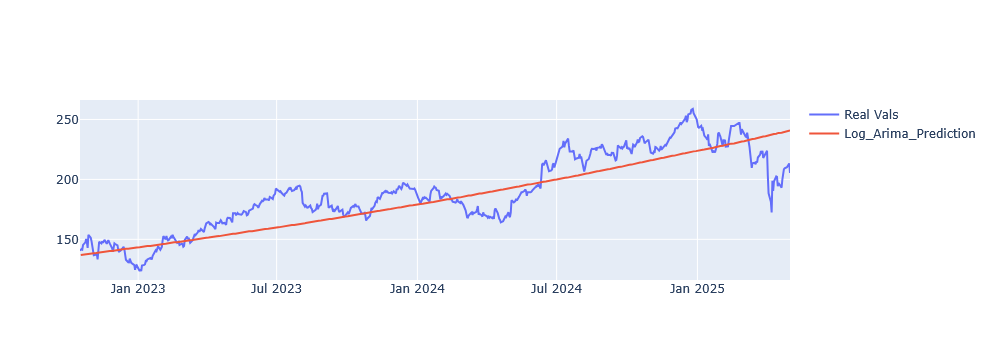

In [571]:
fig = Go.Figure()
fig.add_trace(Go.Scatter(x=X_test_log.index,y=np.exp(X_test_log["adjClose"]),name="Real Vals"))
#transform back the values
preds_log = arima_log_data.predict(len(X_test_log))
preds_log = np.exp(preds_log)
fig.add_trace(Go.Scatter(x=X_test.index,y=pd.DataFrame(preds_log)[0],name="Log_Arima_Prediction"))

In [591]:
#A bit better than the transformed approach, yet it only captures the trend
print("MAPE:" + str(mean_absolute_percentage_error(np.exp(X_test_log),preds_log)))
print("RMSE",str(root_mean_squared_error(np.exp(X_test_log),preds_log)))

MAPE:0.07007581937667659
RMSE 16.364664451455944


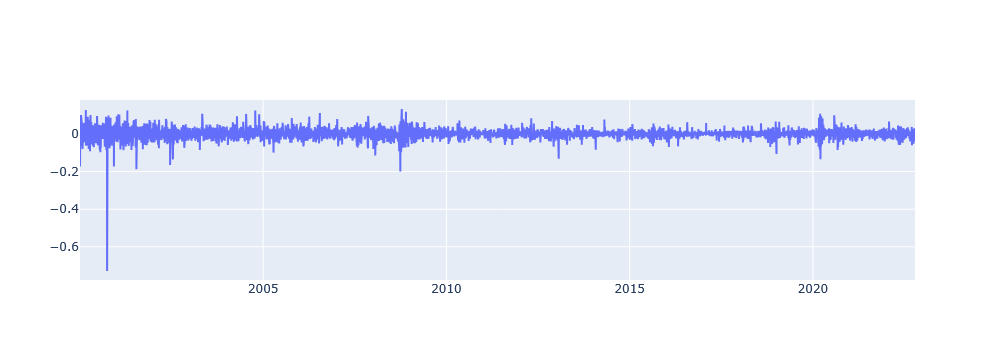

In [603]:
#Checking Residuals it seems like a white noise
fig = Go.Figure()
fig.add_trace(Go.Scatter(x=arima_log_data.resid().index,y=arima_log_data.resid(),name="Log Sarima Residuals"))

Figure(640x480)


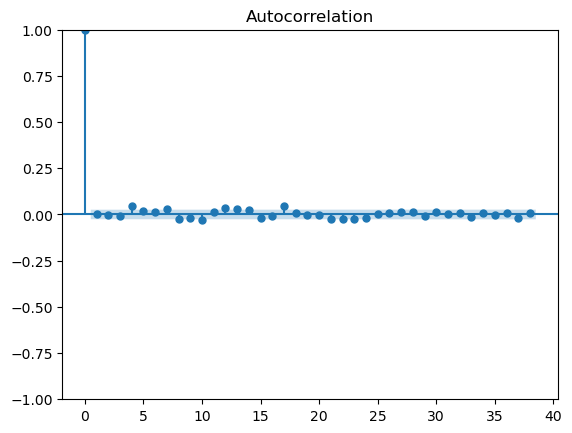

In [611]:
#Checking autocorrelation of the residuals and squared residuals
#Both show no correlation yet I see there is still pattern to capture on the fit vs real comparison
print(tsap.plot_acf(arima_log_data.resid()))

Figure(640x480)


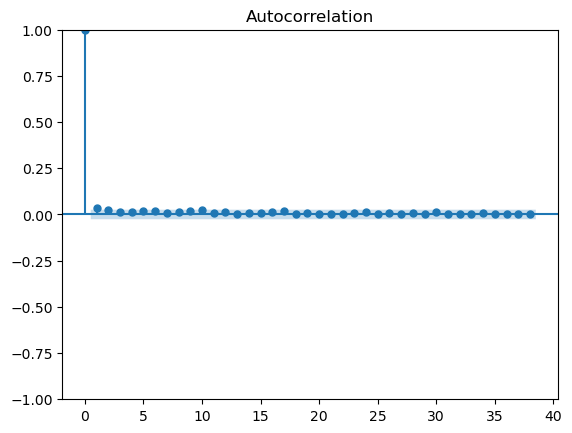

In [609]:
print(tsap.plot_acf(arima_log_data.resid()**2))

Figure(640x480)


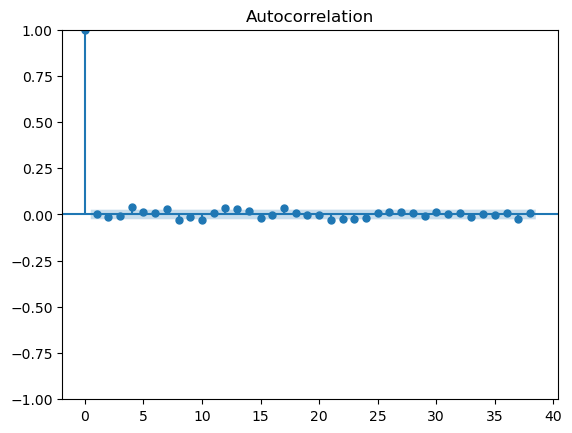

In [619]:
print(tsap.plot_acf(np.exp(arima_log_data.resid())))

In [621]:
#It may be due to that the volatility is time dependent 
#The problem is probably that, I predict log returns and in terms of log returns
#SARIMA captures everything it could. Event het_arch test is not significant  meaning no time dependent volatility exist.
#No autocorrelation exists in residuals, squared residuals or the transformed (to the price with np.exp()) residuals.
#Thus I stop with this approach no more pattern to be captured I guess
from statsmodels.stats.diagnostic import het_arch
test_result = het_arch(arima_log_data.resid())
print(f'p-value: {test_result[1]}')

p-value: 0.055015977610561734
